# Introduction to PCA

We will learn what the PCA does and when to use it

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

## Iris dataset

We will utilize scikit-learn's built-in dataset *iris*, which is a well-known dataset of flower petals, used widely in data science demonstrations.

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, y)
print(df)

      0    1    2    3
0   5.1  3.5  1.4  0.2
0   4.9  3.0  1.4  0.2
0   4.7  3.2  1.3  0.2
0   4.6  3.1  1.5  0.2
0   5.0  3.6  1.4  0.2
..  ...  ...  ...  ...
2   6.7  3.0  5.2  2.3
2   6.3  2.5  5.0  1.9
2   6.5  3.0  5.2  2.0
2   6.2  3.4  5.4  2.3
2   5.9  3.0  5.1  1.8

[150 rows x 4 columns]


## Scaling the dataset

We will explain this step in detail in a future lecture. It is important to **standardize** the dataset before using any ML method, due to a number of reasons. We will just use it now...

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(max(X_scaled[:,0]))
print(min(X_scaled[:,0]))

2.492019202124427
-1.87002413384702


### Apply PCA to the loaded dataset

Now we use PCA to visualize the dataset in a ways we can understand it.

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Linear combination

$v_1 \dots v_4$
</br>
$p_1, p_2$

$p_1 = \alpha v_1 + \beta v_2 + \gamma v_3 + \delta v_4$


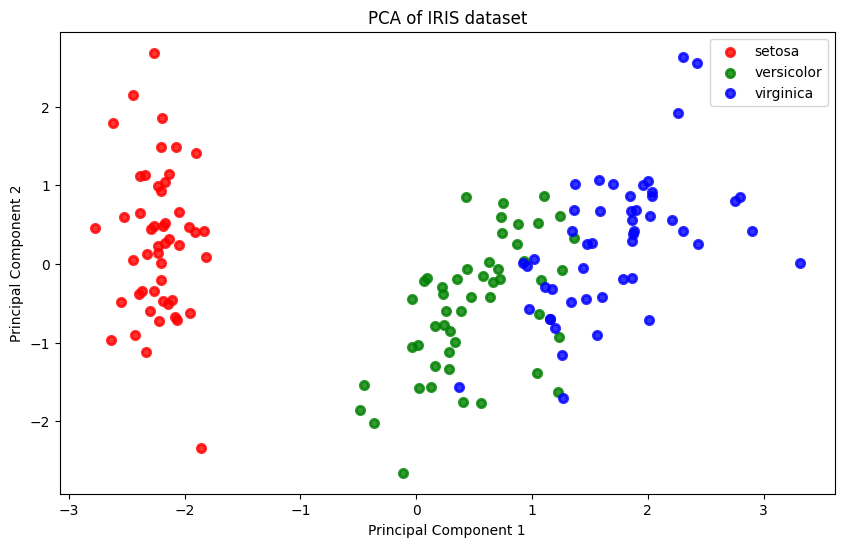

In [5]:
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Questions:
- Which species is most distinguishable from the other two based on the two principal components?
- How much variance do the first and second principal components explain? 
(Hint: Use pca.explained_variance_ratio_)

In [6]:
# Extract explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

Explained Variance Ratio: [0.72962445 0.22850762]
